In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/Data.zip')
zip.extractall()

In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/test.zip')
zip.extractall()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow import keras

In [ ]:
img_width, img_height = 128, 128

train_data_dir = '/content/Data/Train'
validation_data_dir = '/content/Data/Validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16


In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)       

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("data_augment.model", verbose=1 , save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[model_checkpoint, early_stopping, reduce_lr])
# model.save('data_augment.model')

Epoch 1/50
125/125 [==============================] - 53s 415ms/step - loss: 0.7047 - accuracy: 0.4896 - val_loss: 0.6710 - val_accuracy: 0.5850

Epoch 00001: val_loss improved from inf to 0.67099, saving model to data_augment.model
INFO:tensorflow:Assets written to: data_augment.model/assets
Epoch 2/50
125/125 [==============================] - 52s 412ms/step - loss: 0.6730 - accuracy: 0.5761 - val_loss: 0.6503 - val_accuracy: 0.6500

Epoch 00002: val_loss improved from 0.67099 to 0.65031, saving model to data_augment.model
INFO:tensorflow:Assets written to: data_augment.model/assets
Epoch 3/50
125/125 [==============================] - 52s 413ms/step - loss: 0.6840 - accuracy: 0.6068 - val_loss: 0.6285 - val_accuracy: 0.6500

Epoch 00003: val_loss improved from 0.65031 to 0.62853, saving model to data_augment.model
INFO:tensorflow:Assets written to: data_augment.model/assets
Epoch 4/50
125/125 [==============================] - 51s 411ms/step - loss: 0.6564 - accuracy: 0.6120 - val_l

In [ ]:
model.fit_generator(datagen, epochs=no_epochs, callbacks=[model_checkpoint, early_stopping, reduce_lr], verbose=1)
model.save('data_augment.model')

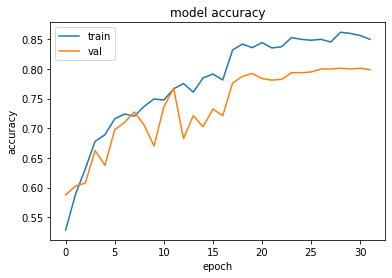

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

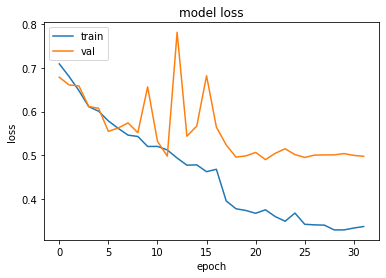

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/data_augment.model')
# predicted_score = model1.predict(testX)
# score = model1.evaluate(testX, testY)
# print("test loss, test acc:", score)

In [ ]:
import os
import cv2
import numpy as np
test = []
for filename in os.listdir('/content/test'):
    img = cv2.imread('/content/test/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (128, 128), cv2.INTER_AREA)
    test.append(RGB_img)
    test.append(RGB_img)


In [ ]:
test = np.array(test)
test = test.astype('float32') / 255.0

[[0.33980754]]


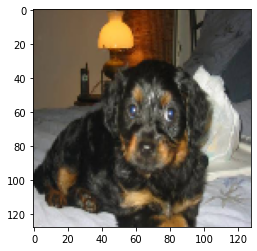

In [ ]:
n = 76
img1 = (test[n] * 255).astype(np.uint8)
img1 = img1.reshape(128,128,3)
plt.imshow(img1)
# img = np.expand_dims(trainx[1], axis=0)
# img = img.astype('float32')
# img = testx[0].reshape(1,testx[0].shape)
img = test[n].reshape(1, 128, 128, 3)
x = model1.predict(img)
print(x)